# Exercise 4.9 Part 2 - Data Visualizations

### 1. Importing libraries and complete/merged dataframe. Creating subsets of the dataframe. 

In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Setting the default path

path = r'C:\Users\peter\Desktop\Career Foundry - Data Analyst\Data Immersion\Achievement 4 - Python\01. Instacart Basket Analysis - June 2023'

In [3]:
# Importing the 'customer_order_product_merged' dataset

df_merged = pd.read_pickle(os.path.join(path, '02. Data', 'Prepared Data', 'customer_order_product_merged.pkl'))

In [4]:
# Checking the df_merged dataframe to see that it was imported correctly 

df_merged.head()

,user_id,first_name,last_name,sex,state,age,date_joined,n_dependants,fam_status,income,...,busiest_day,daily_activity,busiest_period_of_day,max_order,loyalty_flag,mean_spend,spend_flag,median_days_since,order_behavior_flag,_merge
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Busiest days,Average orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both
1,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Regularly busy,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both
2,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Busiest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both
3,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Regularly busy,Average orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both
4,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Least busy days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both


In [5]:
# Changing the decimal output 

pd.set_option('display.float_format', '{:.2f}'.format)

In [ ]:
# Creating a chart for the highest frequence of product orders 



In [6]:
# Creating a subset of the dataframe so we can run visualizations on it. Using the 70/30 structure. 

np.random.seed(4)

dev = np.random.rand(len(df_merged)) <= 0.7

In [7]:
# Store 70% of the sample in the dataframe big

big = df_merged[dev]

MemoryError: Unable to allocate 3.62 GiB for an array with shape (15, 32404859) and data type object

In [ ]:
# Checking the 'big' dataframe shape

big.shape

In [ ]:
# Store 30% of the sample in the dataframe small

small = df_merged[~dev]

In [ ]:
# Checking the 'big' dataframe shape

small.shape

In [11]:
# Seeing that the 2 subsets add up to the complete dataframe

len(small) + len(big)

# All of the rows are accounted for. The 70/30 subsetting was done correctly. 

32404859

### 2. Visualizations

#### Descriptive statistics about sales. Creating a histogram of the order_hour_of_day column.

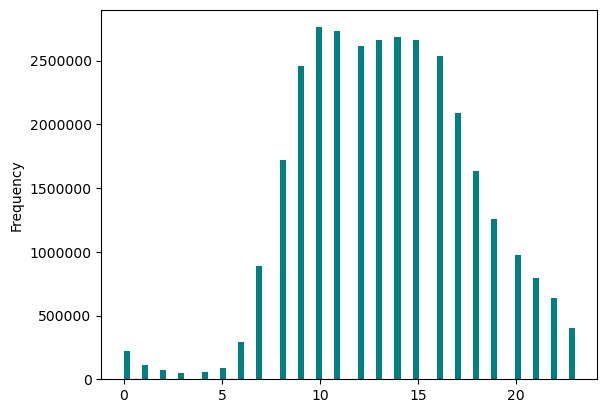

In [12]:
# Creating the histogram from the complete df_merged dataframe

ohod_histogram = df_merged['order_hour_of_day'].plot.hist(color = ['teal'], bins = 75)

# Customize the y-axis tick labels

plt.ticklabel_format(style='plain', axis='y')

From the histogram chart, we can see that the number of orders peaks at around hour 10 and remains the busiest until around hour 16. Before and after that window, we see much less activity in regards to number of orders. 

In [13]:
# Exporting our chart as .png file

ohod_histogram.figure.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'ohod_histogram.png'))

#### The marketing team is curious about the customers in terms of loyalty level. Create a bar chart for the loyalty_flag column.

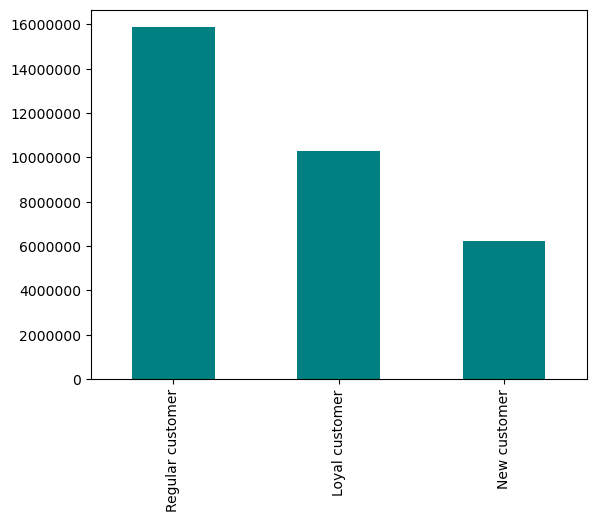

In [14]:
# Creating a bar chart for the counts of the loyalty_flag

loyalty_bar = df_merged['loyalty_flag'].value_counts().plot.bar(color = 'teal')

# Customize the y-axis tick labels

plt.ticklabel_format(style='plain', axis='y')

From the graph above, we can see that most of the orders fall into the 'Regular Customer' category. They account for almost 16,000,000 of the total orders. 

In [15]:
# Exporting the bar chart

loyalty_bar.figure.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'loyalty_bar.png'))

#### Check whether there is a difference in expenditure depending on the hour of the day. We're going to use a line chart based on a small sample of the total dataframe. 

In [16]:
# Creating a subset of the small dataframe to only include the columns in question: prices and order_hour_of_day

df_expenditure = small[['prices', 'order_hour_of_day']]

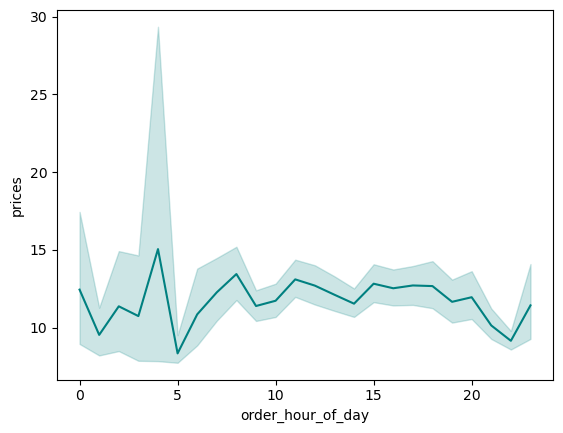

In [17]:
# Creating a line chart to compare the price of orders vs. the time of the day they were ordered

expenditure_line = sns.lineplot(data = df_expenditure, x = 'order_hour_of_day', y = 'prices', color = 'teal')

Based on the graph above, it looks like there is some variablity in the prices and the time of the orders. We can see a peak in price at hour 4 and a dip in price at hour 5. I would like to some more analysis of these hours to see what kinds of products are being ordered or if there are any other notable trends that might be causing this distribution. 

The rest of the hours of the day, specifically 9 - 20, have a pretty consistent price range. 

In [18]:
# Exporting the line chart

expenditure_line.figure.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'expenditure_line.png'))

#### Determine whether there's a connection between age and familty situation. We will create a line graph to compare age and number of dependents.

In [19]:
# Creating a subset of the small dataframe to only include the columns in question: prices and order_hour_of_day

df_dependents = small[['age', 'n_dependants']]

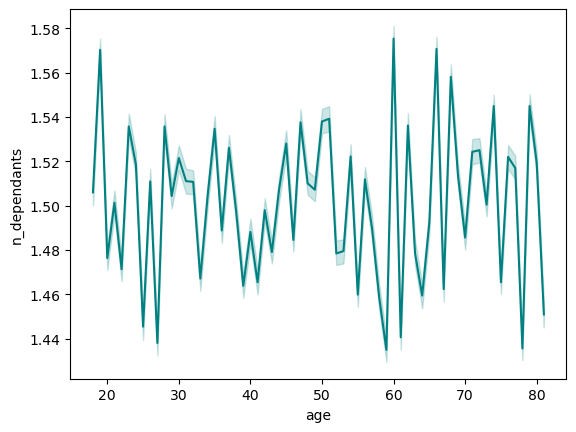

In [20]:
# Creating a line chart to compare the age of the customer vs. the number of dependents they have

dependents_line = sns.lineplot(data = df_dependents, x = 'age', y = 'n_dependants', color = 'teal')

From the chart above, it is hard to determine if there is a direct correlation between the age of the customer and the number of dependents they have. It does look like at about age 60 and above, there are more peaks at a higher average of dependants then the lower age groups. However, age 21 seems to have a high number of dependents too. I would eventually like to run more types of analysis and create more visuals to explore this connection. 

In [21]:
# Exporting the line chart

expenditure_line.figure.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'expenditure_line.png'))

#### Explore the connection between age and spending power (income). We will create a scatterplot to compare this relationship.

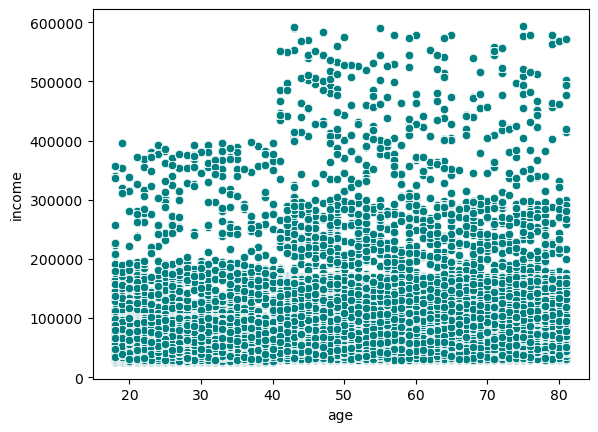

In [22]:
# Creating a scatterplot of the entire merged dataframe 

income_scatter = sns.scatterplot(x = 'age', y = 'income', data = df_merged, color = 'teal')

Based on the chart above, it does look like there is a significant increase in spending power (income) past the age of 40. These customers may be more likely to buy more or more often because they have more disposable income. 

In [23]:
# Exporting the scatterplot chart

income_scatter.figure.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'income_scatter.png'))